## 哔哩哔哩番剧数据分析-2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']
# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题,或者转换负号为字符串
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['KaiTi', 'Arial']})

In [3]:
# 导入数据
# 
# csv_file_path = './raw_vbilibili.csv.gz'
csv_file_path = "".join(['raw_', 'bilibili', '.csv.gz'])
# create a DataFrame
df = pd.read_csv(csv_file_path, compression='gzip', index_col=0, encoding='utf-8')
df.head()

,media_id,favorites,coins,views,danmakus,media_tags,score,cm_count
0,6312,3558734,431229,82208552,2133541,"['恋爱', '校园', '漫画改', '搞笑', '日常', '声控']",9.6,22235.0
1,102792,3838468,482165,87398650,2695540,"['恋爱', '推理', '游戏改', '冒险']",9.6,42162.0
2,6446,3911659,452858,102659185,3190601,"['萌系', '搞笑', '日常', '漫画改']",9.4,29521.0
3,8792,3954400,635263,193861261,2922407,"['小说改', '奇幻', '战斗', '魔法', '架空', '穿越']",9.6,58505.0
4,130412,3976659,960553,131914751,2567173,"['小说改', '热血', '奇幻', '战斗', '励志', '架空', '穿越', '冒险']",8.3,72987.0


### 4.数据分析

### 任务1：根据media tags，不同风格的番剧，scroe、coins、favorite、views、danmakus平均数据如何

In [4]:
#将元组拆包，获取tag_list，使用set去除重复
#dataframe 中某一列是元组形式拆成3列
tag_list = []
max = 0
for tags in df['media_tags']:
    line = eval(tags)
    if len(line) > max:
        max = len(line)
    for i in line:
        tag_list.append(i)
tag_list = list(set(tag_list))

In [5]:
# tag_list
# ['偶像', '机战', '小说改', '架空', '穿越', '少女', '智斗', '搞笑', '布袋戏', '催泪', '游戏改', '原创', '运动', '魔法', '科幻',, '战斗', '日常', '神魔', '漫画改', '美食', '校园', '音乐', '奇幻', '泡面', '励志', '推理', '萌系', '热血', '职场', '恋爱', '萝莉', '少儿', '历史', '乙女', '社团', '声控', '时泪', '治愈']
# df['media_tags']
# max=8    

将meida_tags分列

In [6]:
df.head()

,media_id,favorites,coins,views,danmakus,media_tags,score,cm_count
0,6312,3558734,431229,82208552,2133541,"['恋爱', '校园', '漫画改', '搞笑', '日常', '声控']",9.6,22235.0
1,102792,3838468,482165,87398650,2695540,"['恋爱', '推理', '游戏改', '冒险']",9.6,42162.0
2,6446,3911659,452858,102659185,3190601,"['萌系', '搞笑', '日常', '漫画改']",9.4,29521.0
3,8792,3954400,635263,193861261,2922407,"['小说改', '奇幻', '战斗', '魔法', '架空', '穿越']",9.6,58505.0
4,130412,3976659,960553,131914751,2567173,"['小说改', '热血', '奇幻', '战斗', '励志', '架空', '穿越', '冒险']",8.3,72987.0


In [7]:
len(df)

1337

In [8]:
# df.groupby('media_id')
# df.head()

In [9]:
list_all = []
for tags in df['media_tags']:
    line = eval(tags)
    list_8_each = []
    for i in np.arange(max):
        list_each = []
        if i < len(line):
            list_each.append(line[i])
        else:
            list_each.append('null')
        list_8_each.append(list_each)
# list_np.append(list_8_each)
    list_all.append(list_8_each)
# list_all
# len(list_all[:][:])-1377

In [10]:
ar = np.array(list_all)
# ar.shape-(1337, 8, 1)
ar.reshape((1337,8))
# ar.reshape((8,1337))
# ar = np.vstack(ar).reshape((8, 1337))
ar = np.hstack(ar)
# ar
for i in np.arange(max):
    df['media_tag' + str(i)] = ar[i]
# df

根据番剧类别求均值

In [11]:
import math
score_avg = dict()
score_avg_list = []
for tag in tag_list:
    score_each = 0
    count = 0
    for i in np.arange(max):
        m = (df[df['media_tag'+str(i)] == tag]).score.mean()
        if math.isnan(m) == False:
            score_each += m
            count += 1
    score_each = score_each / count
    score_avg[tag] = score_each
    score_avg_list.append(score_each)
# score_avg_list

In [12]:
# 统计各个tag出现的频率
count_dict = dict()
count_list =[]
for tag in tag_list:
    count = 0
    for i in np.arange(max):
        m = len(df[df['media_tag'+str(i)] == tag])
        count += m
    count_dict[tag] = count
    count_list.append(count)
# count_dict

In [13]:
# 创建tag dict用于后续匹配
tag_dict = dict()
count = 0
for tag in tag_list:
    tag_dict[tag] = count
    count += 1
# tag_dict
# 键值对互换，后续通过序号找tag
tag_dict = {v:k for k, v in tag_dict.items()}
# tag_dict

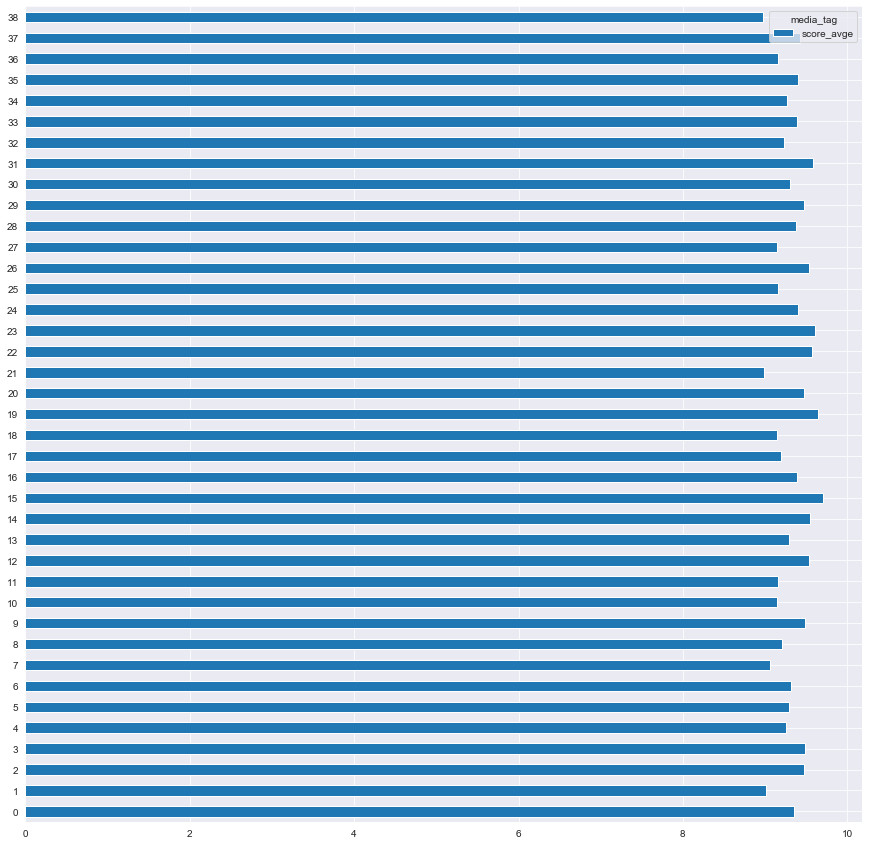

In [14]:
# 中文无法正常显示，使用标号代替
df_score_avg = pd.DataFrame(score_avg_list, index=np.arange(len(tag_list)),columns=pd.Index(['score_avge'],name='media_tag'))
fig, ax = plt.subplots(figsize=(15, 15))
df_score_avg.plot(kind='barh',ax=ax)

In [15]:
df_score_avg.describe().T

,count,mean,std,min,25%,50%,75%,max
media_tag,,,,,,,,
score_avge,39.0,9.336516,0.190188,8.972845,9.17776,9.350391,9.482123,9.7


#### 数据都集中在9-10之间，不直观，做min-max标准化处理

In [16]:
df_score_avg_norm = (df_score_avg - df_score_avg.min()) / (df_score_avg.max() - df_score_avg.min())
df_score_avg_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
media_tag,,,,,,,,
score_avge,39.0,0.500128,0.261551,0.0,0.281804,0.519209,0.70037,1.0


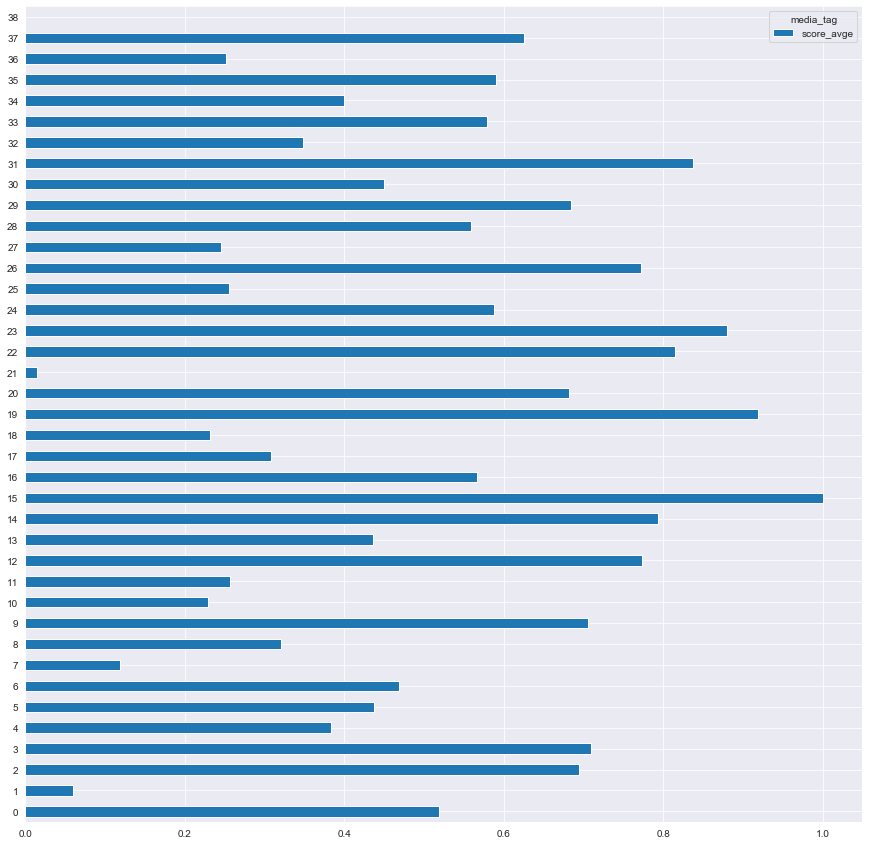

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
df_score_avg_norm.plot(kind='barh',ax=ax)

In [18]:
# 按score_avg的大小进行排序
df_score_avg_norm['frequency'] = count_list
df_score_avg_norm=df_score_avg_norm.sort_values(by=['score_avge'],ascending=False)
df_score_avg_norm.head()

media_tag,score_avge,frequency
15,1.000000,1
19,0.918556,54
23,0.880130,162
31,0.837223,53
22,0.814517,66


In [107]:
# 去除frequency<16的数据
df_score_avg_norm = df_score_avg_norm[(df_score_avg_norm.frequency>16)]

In [108]:
# 查看数据情况，发现有异常
# 
# count_dict
df_score_avg_norm.head(5)

media_tag,score_avge,frequency
34,0.918556,54
5,0.880130,162
12,0.837223,53
32,0.814517,66
1,0.793961,152


In [111]:
# 先去除frequency
data = df_score_avg_norm.drop(['frequency'],axis=1)

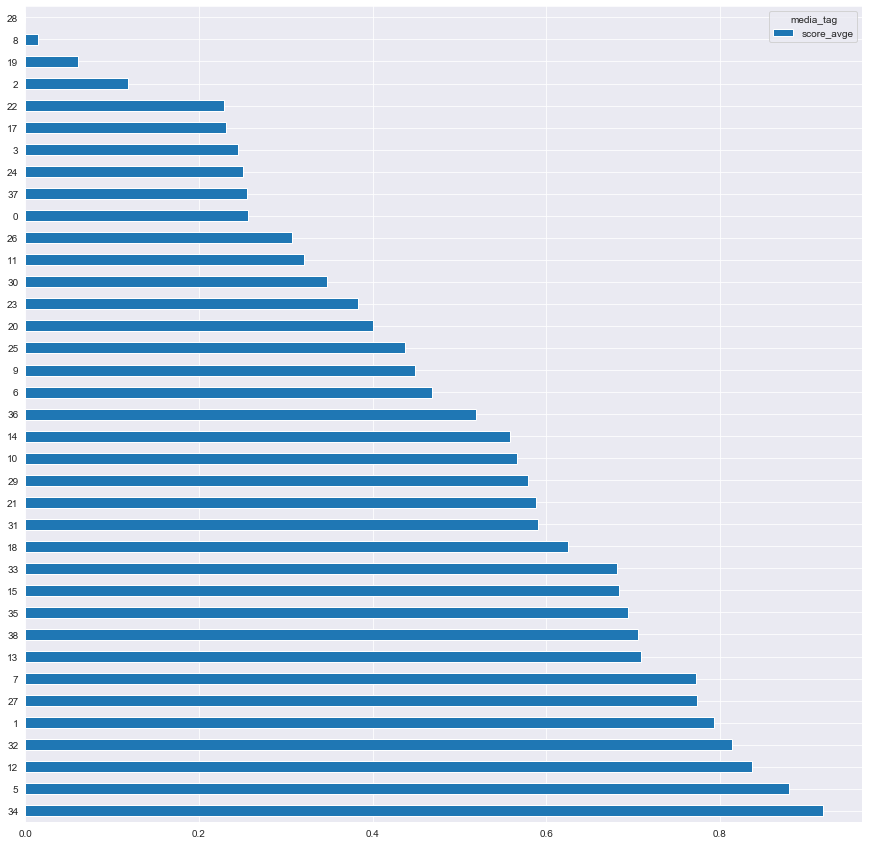

In [112]:
# 去除样本量较少的干扰项后重新画图
fig, ax = plt.subplots(figsize=(15, 15))
data.plot(kind='barh',ax=ax)

In [116]:
# 查看排名前5的番剧类型，时泪、治愈、励志、运动、搞笑等类型比较受欢迎
print(tag_dict[34])
print(tag_dict[5])
print(tag_dict[12])
print(tag_dict[32])
print(tag_dict[1])
data.head(5)

时泪
治愈
励志
运动
搞笑


media_tag,score_avge
34,0.918556
5,0.880130
12,0.837223
32,0.814517
1,0.793961


箱线图处理异常值处理

In [ ]:
def handle_exception_val(data, col):
    #定义一个下限
    lower = data[col].quantile(0.25)-1.5*(data[col].quantile(0.75)-data[col].quantile(0.25))
    #定义一个上限
    upper = data[col].quantile(0.25)+1.5*(data[col].quantile(0.75)-data[col].quantile(0.25))
    #重新加入一列，用于判断
    data['qutlier'] = (data[col] < lower) | (data[col] > upper) 
    #筛选异常数据
    data[data['qutlier'] ==True]
    #过滤掉异常数据
    qutlier_data=data[data['qutlier'] ==False]
    return data

In [ ]:
# df_score_avg_norm = handle_exception_val(df_score_avg_norm, 'frequency')
# df_score_avg_norm

### 任务2：查看不同数据之间的关系如何scroe、coins、favorite、views、danmakus

#### 使用scatter_matrix查看数据分布情况

In [117]:
df = pd.read_csv(csv_file_path, compression='gzip', index_col=0, encoding='utf-8')
df.head()

,media_id,favorites,coins,views,danmakus,media_tags,score,cm_count
0,6312,3558734,431229,82208552,2133541,"['恋爱', '校园', '漫画改', '搞笑', '日常', '声控']",9.6,22235.0
1,102792,3838468,482165,87398650,2695540,"['恋爱', '推理', '游戏改', '冒险']",9.6,42162.0
2,6446,3911659,452858,102659185,3190601,"['萌系', '搞笑', '日常', '漫画改']",9.4,29521.0
3,8792,3954400,635263,193861261,2922407,"['小说改', '奇幻', '战斗', '魔法', '架空', '穿越']",9.6,58505.0
4,130412,3976659,960553,131914751,2567173,"['小说改', '热血', '奇幻', '战斗', '励志', '架空', '穿越', '冒险']",8.3,72987.0


查看数据的分布情况

//anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


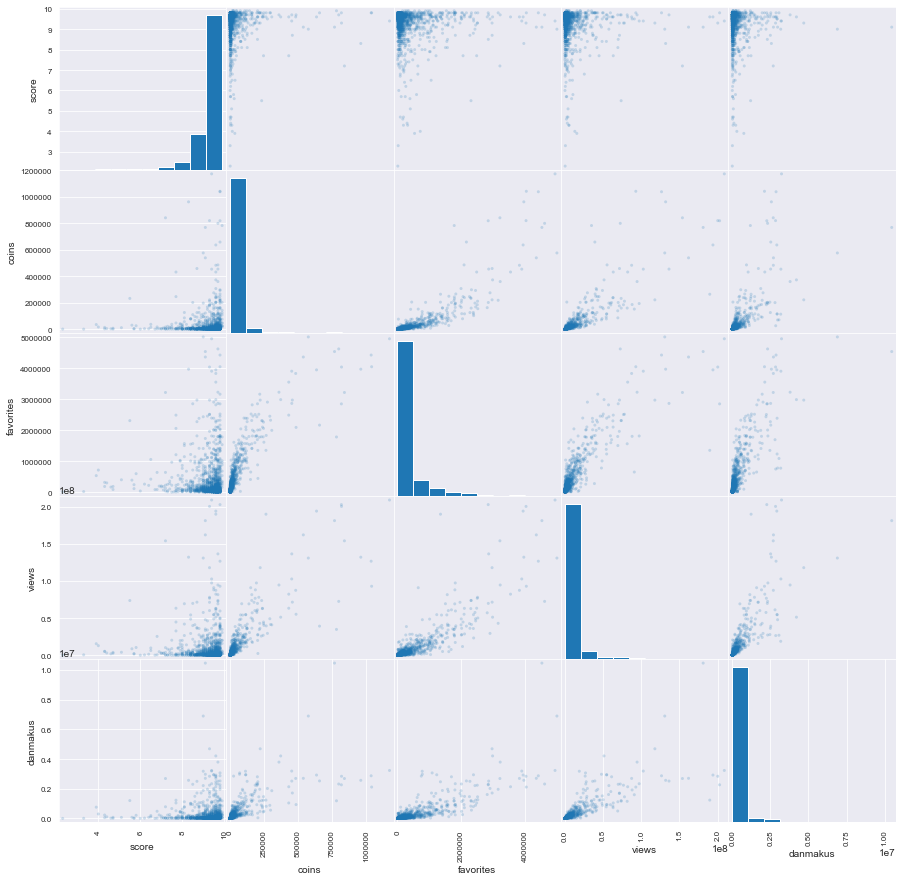

In [118]:
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(figsize=(15, 15))
scatter_matrix(df[['score', 'coins', 'favorites', 'views', 'danmakus']], alpha=0.2, diagonal='hist', ax=ax);

//anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


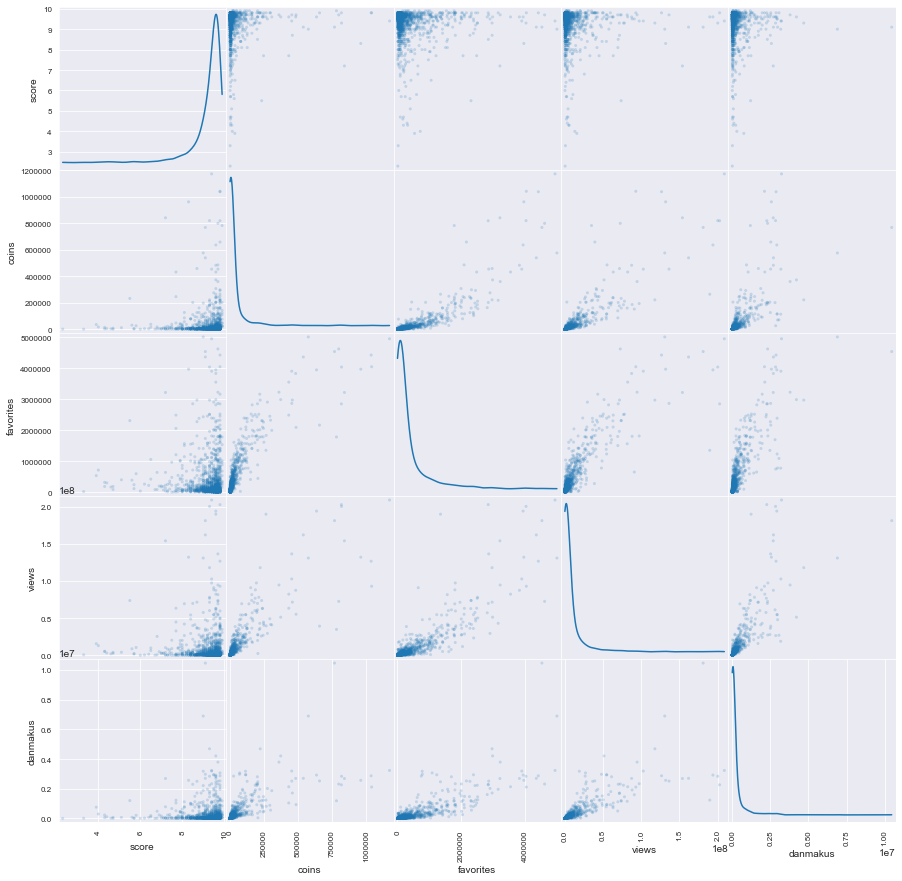

In [119]:
fig, ax = plt.subplots(figsize=(15, 15))
scatter_matrix(df[['score', 'coins', 'favorites', 'views', 'danmakus']], alpha=0.2, diagonal='kde', ax=ax);

光看图看不太懂，一般来说应该分析一下数据分布的情况，但是这里有更方便的方案，使用corr()来看不同数据间的关联性。

#### 任务2.2 分析不同特征之前的关联系数

#### 使用pd.corr()查看数据之间的关联性，并且用heatmap表示出来。通过三种不同的统计学系数，pearson,kendall,

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
media_id,1337.0,2.404165e+06,7.534039e+06,7.0,1778.0,3673.0,8672.0,28223473.0
favorites,1337.0,3.648062e+05,6.476820e+05,3486.0,43177.0,120178.0,359062.0,5017344.0
coins,1337.0,3.090961e+04,9.914147e+04,21.0,1127.0,3856.0,17411.0,1171601.0
views,1337.0,8.067780e+06,2.063168e+07,14527.0,496955.0,1644174.0,6081466.0,208738002.0
danmakus,1337.0,2.277813e+05,6.056559e+05,18.0,10785.0,35235.0,165894.0,10464988.0
score,1337.0,9.268886e+00,7.576978e-01,2.3,9.2,9.5,9.7,9.9
cm_count,1337.0,3.841648e+03,1.338072e+04,100.0,209.0,573.0,2016.0,202745.0


In [122]:
import seaborn as sns

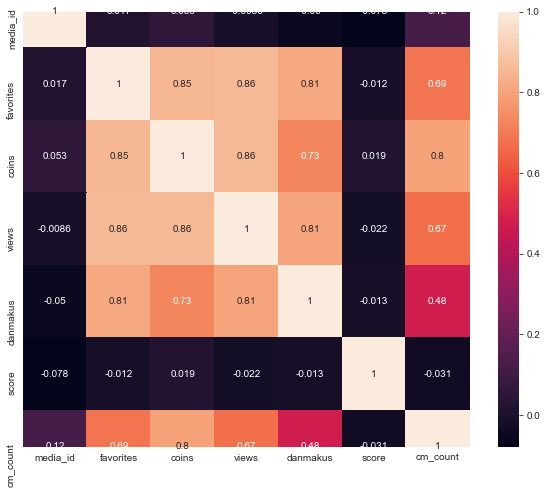

In [123]:
# pearson要求数据是：成对数据、连续 符合正态分布；数据间差异不能太大；变量准差不能为0即两变量中任何一个值不能都是相同。
# 因此也不是很适用此数据，不过好在我们还有spearman
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(method='pearson'),annot=True,ax=ax)

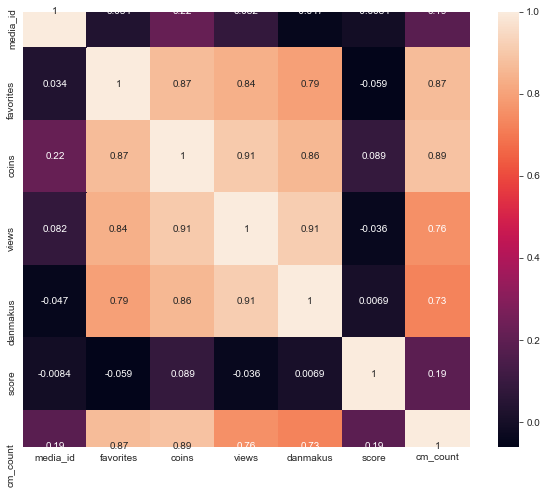

In [124]:
# 使用spearman相关性系数，可以得出score与其他数据关联性不大，scoins-fav,views-fav,views-coins,
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(method='spearman'),annot=True,ax=ax)

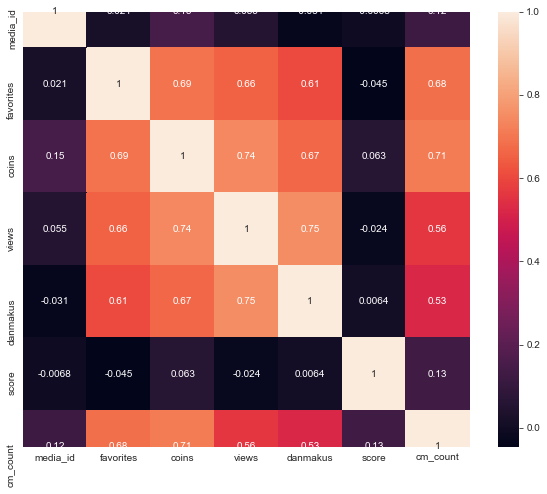

In [125]:
# kendall计算的对象是分类变量，通常要求相关性系数是有序分类变量[优、良、差]，例如：用于两个或者多个评委对某几个选手的评价标准是否一致等
# 因此kendall不适用于此类数据
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(method='kendall'),annot=True,ax=ax)

In [127]:
# 找到最合适的关联系数，筛选强相关数据
# df.corr()[(df.corr()>0.8)][df.corr()!=1]
df.corr()[df.corr(method='spearman')>0.8][df.corr(method='spearman')!=1]

,media_id,favorites,coins,views,danmakus,score,cm_count
media_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorites,NaN,NaN,0.853389,0.859033,NaN,NaN,0.687279
coins,NaN,0.853389,NaN,0.858246,0.730229,NaN,0.798856
views,NaN,0.859033,0.858246,NaN,0.806235,NaN,NaN
danmakus,NaN,NaN,0.730229,0.806235,NaN,NaN,NaN
score,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cm_count,NaN,0.687279,0.798856,NaN,NaN,NaN,NaN


结论：coins、favorites、views三者相关性较大，我们可以判断views和favorite增加会使得coins增加。

### 任务3：查看不同tag的view均值，找到views最高的番剧类型

In [128]:
df = pd.read_csv(csv_file_path, compression='gzip', index_col=0, encoding='utf-8')
df.head()

,media_id,favorites,coins,views,danmakus,media_tags,score,cm_count
0,6312,3558734,431229,82208552,2133541,"['恋爱', '校园', '漫画改', '搞笑', '日常', '声控']",9.6,22235.0
1,102792,3838468,482165,87398650,2695540,"['恋爱', '推理', '游戏改', '冒险']",9.6,42162.0
2,6446,3911659,452858,102659185,3190601,"['萌系', '搞笑', '日常', '漫画改']",9.4,29521.0
3,8792,3954400,635263,193861261,2922407,"['小说改', '奇幻', '战斗', '魔法', '架空', '穿越']",9.6,58505.0
4,130412,3976659,960553,131914751,2567173,"['小说改', '热血', '奇幻', '战斗', '励志', '架空', '穿越', '冒险']",8.3,72987.0


In [129]:
list_all = []
for tags in df['media_tags']:
    line = eval(tags)
    list_8_each = []
    for i in np.arange(max):
        list_each = []
        if i < len(line):
            list_each.append(line[i])
        else:
            list_each.append('null')
        list_8_each.append(list_each)
# list_np.append(list_8_each)
    list_all.append(list_8_each)
# list_all
# len(list_all[:][:])-1377

In [130]:
ar = np.array(list_all)
# ar.shape-(1337, 8, 1)
ar.reshape((1337,8))
# ar.reshape((8,1337))
# ar = np.vstack(ar).reshape((8, 1337))
ar = np.hstack(ar)
# ar
for i in np.arange(max):
    df['media_tag' + str(i)] = ar[i]
# df

In [134]:
# 获得均值列表
import math
views_avg = dict()
views_avg_list = []
for tag in tag_list:
    views_each = 0
    count = 0
    for i in np.arange(max):
        m = (df[df['media_tag'+str(i)] == tag]).views.mean()
        if math.isnan(m) == False:
            views_each += m
            count += 1
    views_each = views_each / count
    views_avg[tag] = views_each
    views_avg_list.append(views_each)
# views_avg_list
# views_avg

In [ ]:
# 统计各个tag出现的频率
count_dict = dict()
count_list =[]
for tag in tag_list:
    count = 0
    for i in np.arange(max):
        m = len(df[df['media_tag'+str(i)] == tag])
        count += m
    count_dict[tag] = count
    count_list.append(count)
# count_dict

In [135]:
# 创建tag dict用于后续匹配
tag_dict = dict()
count = 0
for tag in tag_list:
    tag_dict[tag] = count
    count += 1
# tag_dict
# 键值对互换，后续通过序号找tag
tag_dict = {v:k for k, v in tag_dict.items()}
# tag_dict

In [153]:
# df_views_avg创建，并且将数据标准化、去除干扰数据
df_views_avg = pd.DataFrame(views_avg_list, index=np.arange(len(tag_list)),columns=pd.Index(['views'],name='media_tag'))
df_views_avg['frequency'] = count_list
# df_views_avg = df_views_avg[(df_score_avg_norm.frequency>16)]
df_views_avg = (df_views_avg - df_views_avg.min()) / (df_views_avg.max() - df_views_avg.min())
df_views_avg=df_views_avg.sort_values(by=['views'],ascending=False)
df_views_avg.head()

media_tag,views,frequency
1,1.000000,0.388175
22,0.931952,0.187661
0,0.812894,0.298201
3,0.738088,0.172237
13,0.636706,0.424165


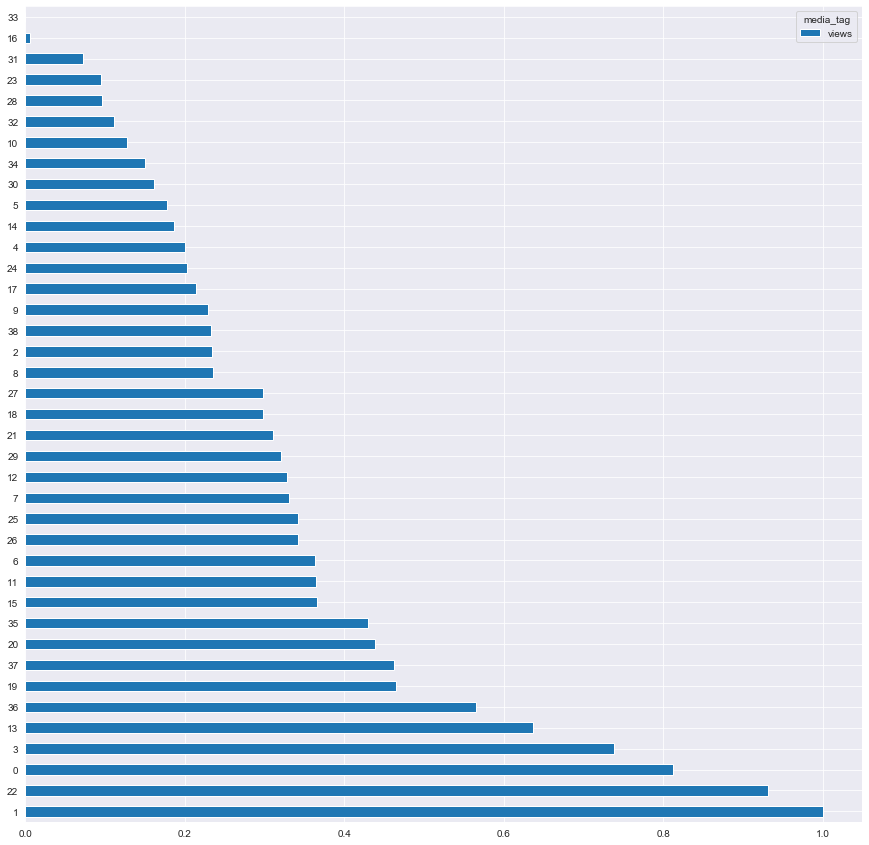

In [150]:
df_views_avg = df_views_avg.drop(['frequency'],axis=1)
fig, ax = plt.subplots(figsize=(15, 15))
df_views_avg.plot(kind='barh',ax=ax)

In [154]:
# viewavg 排名排五位的番剧类型有：搞笑、穿越、冒险、魔法、漫画改
print(tag_dict[1])
print(tag_dict[22])
print(tag_dict[0])
print(tag_dict[3])
print(tag_dict[13])
df_views_avg.head(5)

搞笑
穿越
冒险
魔法
漫画改


media_tag,views,frequency
1,1.000000,0.388175
22,0.931952,0.187661
0,0.812894,0.298201
3,0.738088,0.172237
13,0.636706,0.424165


### 总结：我们通过简单的数据分析可以找出比较受欢迎的几个番剧类型，且评价的指标与coins强相关。从个人层面考虑，我们可以根据此结果挑选番剧观看；从商业角度考虑，假设coins为收益，那么可以将views和favorite其作为投资番剧的指标。

# END